In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import helpers.processing_helpers as ph

In [3]:
df_dev = pd.read_csv("./dataset/development.csv")

In [4]:
noise_indexes = [0,7,12,15,16,17]
acc_idxs = [1,2,3,4,5,6,8,9,10,11,13,14]
features = ["pmax", "negpmax", 'area', 'tmax', 'rms']

sensors_removed = df_dev.drop(columns=ph.get_column_names(features, noise_indexes))

# Starting with negpmax outliers

In [5]:
# Checking how many of the sensors have values above 0
negpmax_clms = sensors_removed[[f'negpmax[{i}]' for i in acc_idxs]]
df_above_zero = negpmax_clms[(negpmax_clms > 0).any(axis=1)]

# We can see that three of the events include a negpmax value above 0 and they are above 70000, and clearly faulty readings.
df_above_zero

,negpmax[1],negpmax[2],negpmax[3],negpmax[4],negpmax[5],negpmax[6],negpmax[8],negpmax[9],negpmax[10],negpmax[11],negpmax[13],negpmax[14]
93055,-5.230824,74820.439676,-6.426794,-7.850610,-72.066412,-19.270636,-12.398489,-4.941119,-7.263858,-4.484512,-7.634818,-6.796109
188194,-5.892503,74827.377234,-5.836270,-5.698038,-19.653781,-5.550021,-4.592166,-4.340689,-40.689526,-10.598145,-39.415897,-4.135703
232393,-18.781116,-19.235596,-17.818414,-19.567654,-17.616177,-19.700745,-16.931372,-22.695142,-32.393964,-36.985382,-28.748840,74812.277374


In [6]:
print(sensors_removed.shape[0])
sensors_removed = sensors_removed.drop(df_above_zero.index.values)
print(sensors_removed.shape[0])

385500
385497


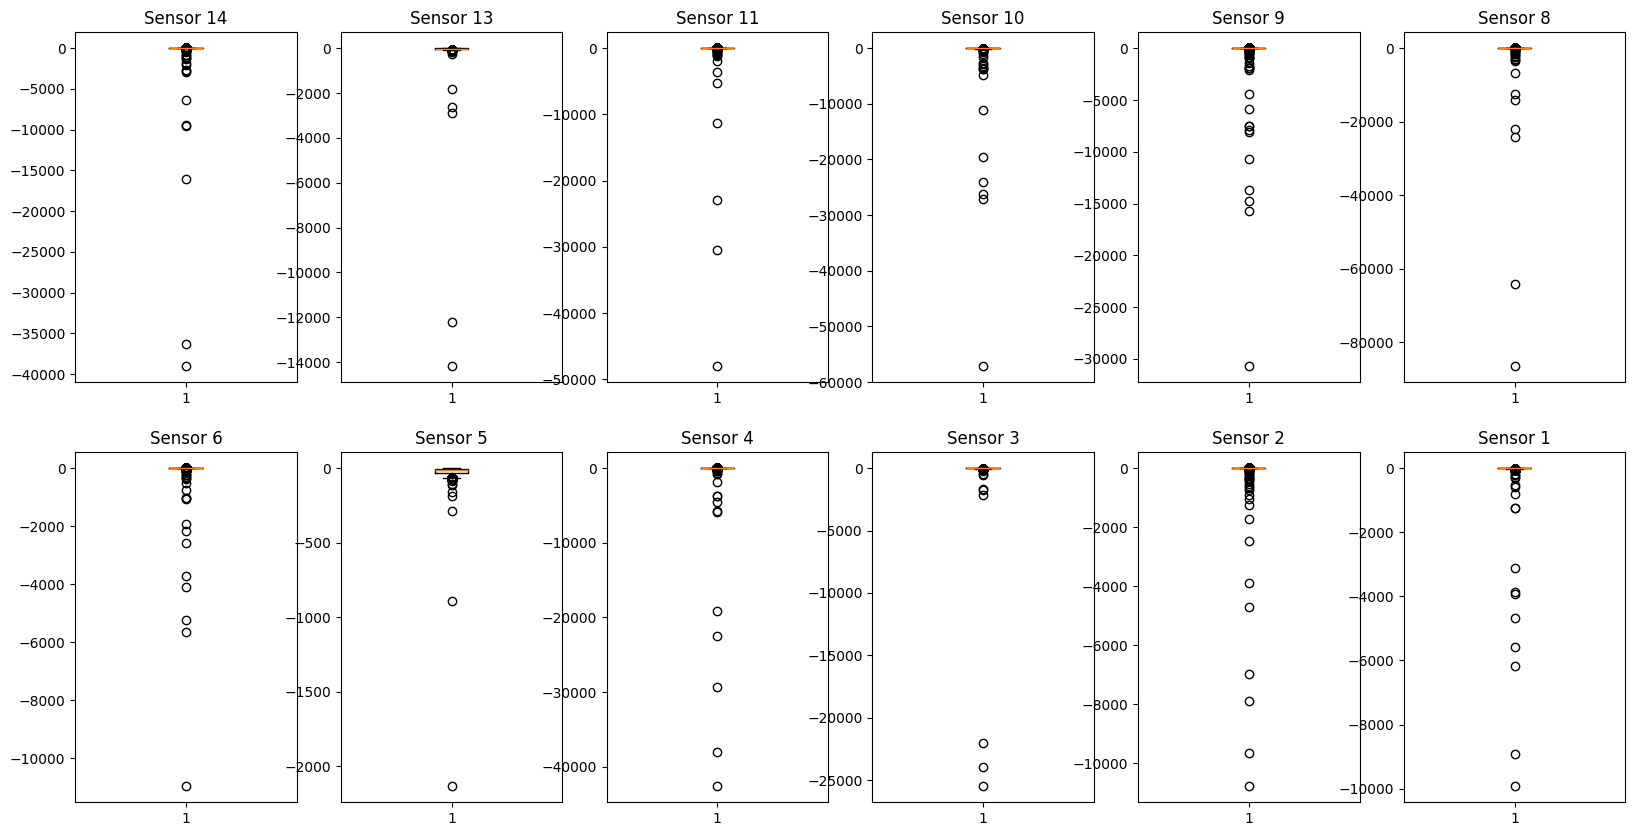

In [7]:
fig, ax = plt.subplots(2, 6, figsize=(20, 10))
idxs = acc_idxs.copy()
for i in range(2):
    for j in range(6):
        idx = idxs.pop()
        ax[i, j].boxplot(sensors_removed[f'negpmax[{idx}]'])
        ax[i, j].set_title("Sensor " + str(idx))

{'whiskers': [<matplotlib.lines.Line2D at 0x26a0cfaf050>,
 'caps': [<matplotlib.lines.Line2D at 0x26a0cfb0790>,
 'boxes': [<matplotlib.lines.Line2D at 0x26a0cf8b4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x26a0cfb1e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x26a0cfb2990>],
 'means': []}

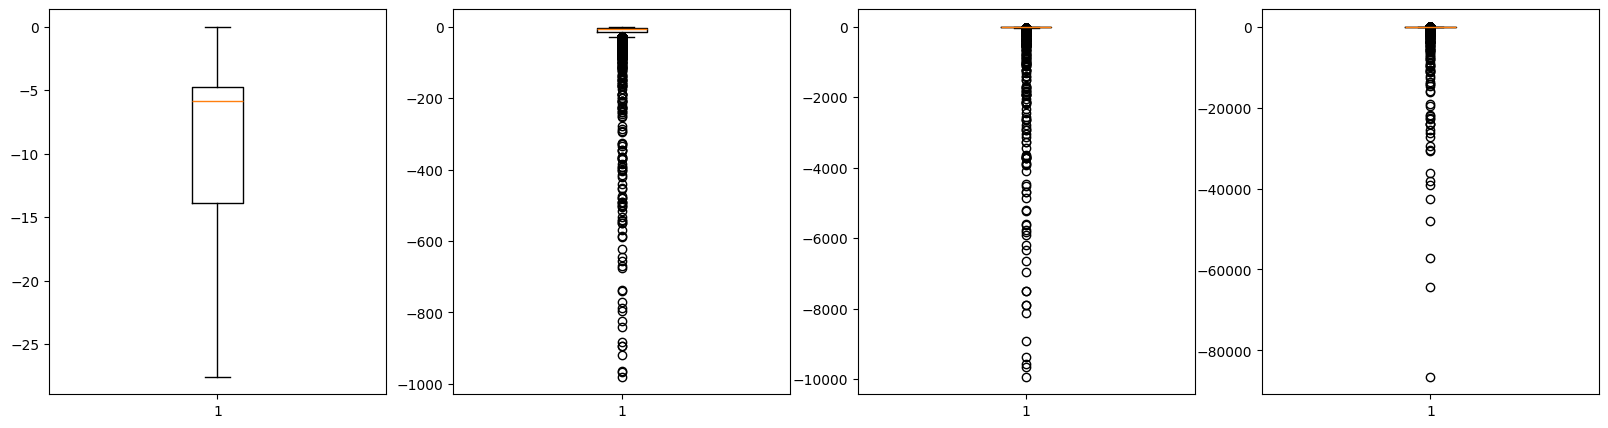

In [8]:
# Joining all the negpmax values of all the sensors
joined_negpmax = pd.concat([sensors_removed[clmn] for clmn in negpmax_clms])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

ax1.boxplot(joined_negpmax, showfliers=False)
ax2.boxplot(joined_negpmax[joined_negpmax > -1000])
ax3.boxplot(joined_negpmax[joined_negpmax > -10000])
ax4.boxplot(joined_negpmax)

In [9]:
df_below = negpmax_clms[(negpmax_clms < -40000).any(axis=1)]
df_below

,negpmax[1],negpmax[2],negpmax[3],negpmax[4],negpmax[5],negpmax[6],negpmax[8],negpmax[9],negpmax[10],negpmax[11],negpmax[13],negpmax[14]
29620,-4.085245,-4.155222,-5.957225,-5.178799,-11.825500,-4.712555,-48.250687,-12.785474,-31.217343,-48053.652150,-3.681378,-7.397391
44319,-3.872687,-4.407233,-4.613116,-42648.221376,-27.847595,-40.080081,-9.886993,-4.787943,-5.082312,-4.388821,-4.963489,-5.594153
305394,-24.608798,-7.010568,-33.224307,-7.958765,-5.996329,-4.682150,-5.489982,-5.234698,-57175.301549,-4.591614,-40.384982,-5.583603
336807,-18.603384,-4.163171,-9.455725,-3.414682,-4.917609,-3.946683,-64260.739499,-3.952219,-5.789792,-11.068951,-57.863834,-27.759344
378283,-54.740646,-5.767374,-16.895178,-6.927109,-4.333557,-5.385352,-86543.677185,-4.072474,-1021.631854,-7.282730,-30.288586,-10.809790


<Axes: ylabel='Frequency'>

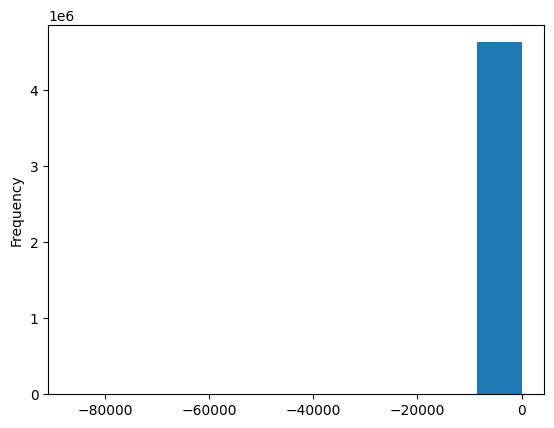

In [10]:
joined_negpmax.plot(kind='hist')

# pmax outliers

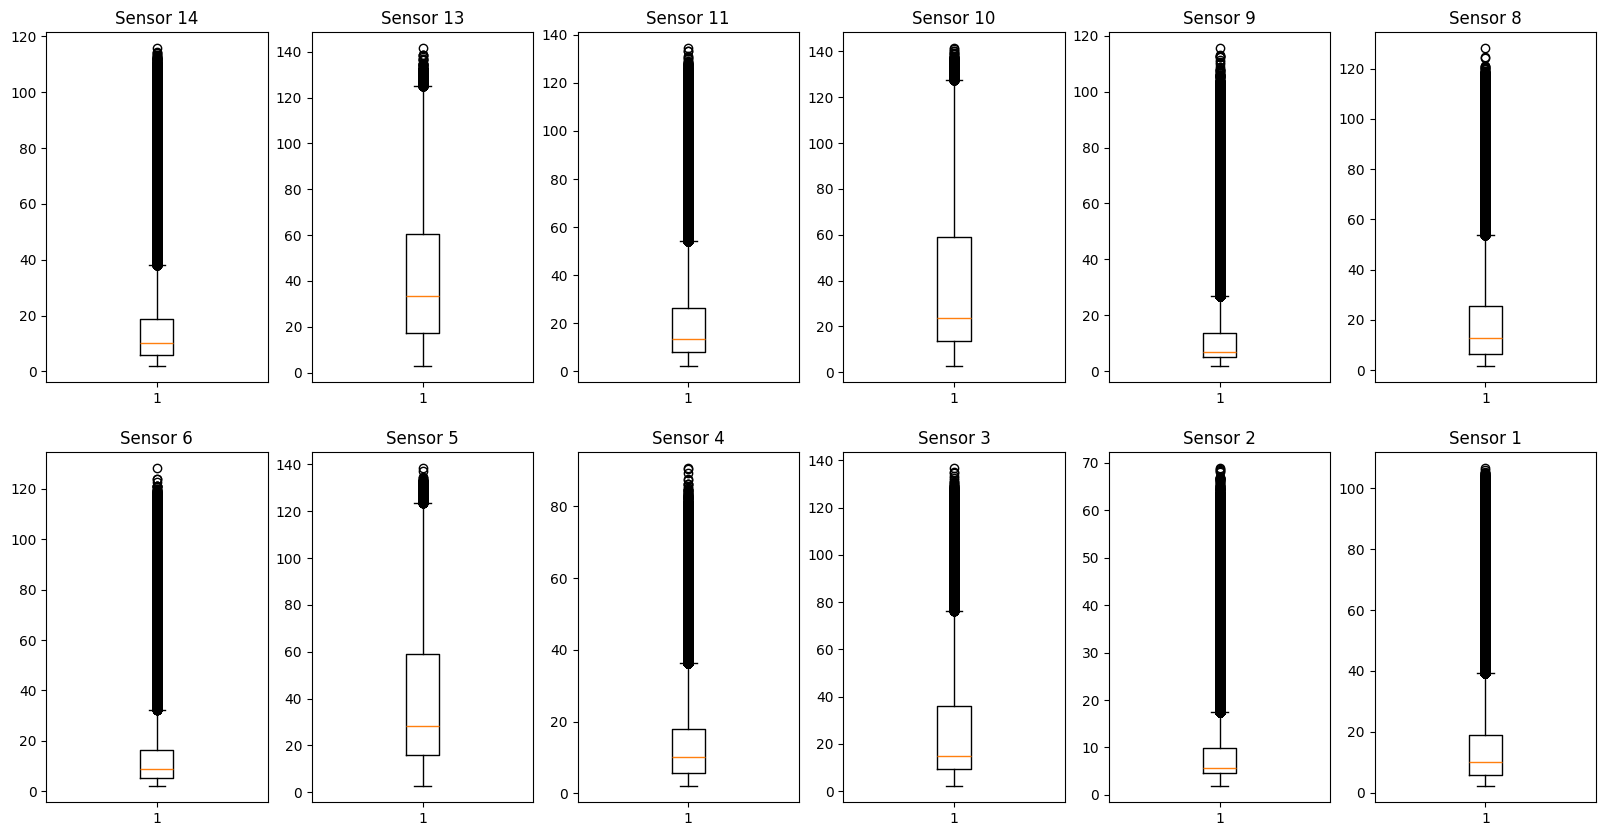

In [11]:
fig, ax = plt.subplots(2, 6, figsize=(20, 10))
idxs = acc_idxs.copy()
for i in range(2):
    for j in range(6):
        idx = idxs.pop()
        ax[i, j].boxplot(sensors_removed[f'pmax[{idx}]'])
        ax[i, j].set_title("Sensor " + str(idx))

# area outliers

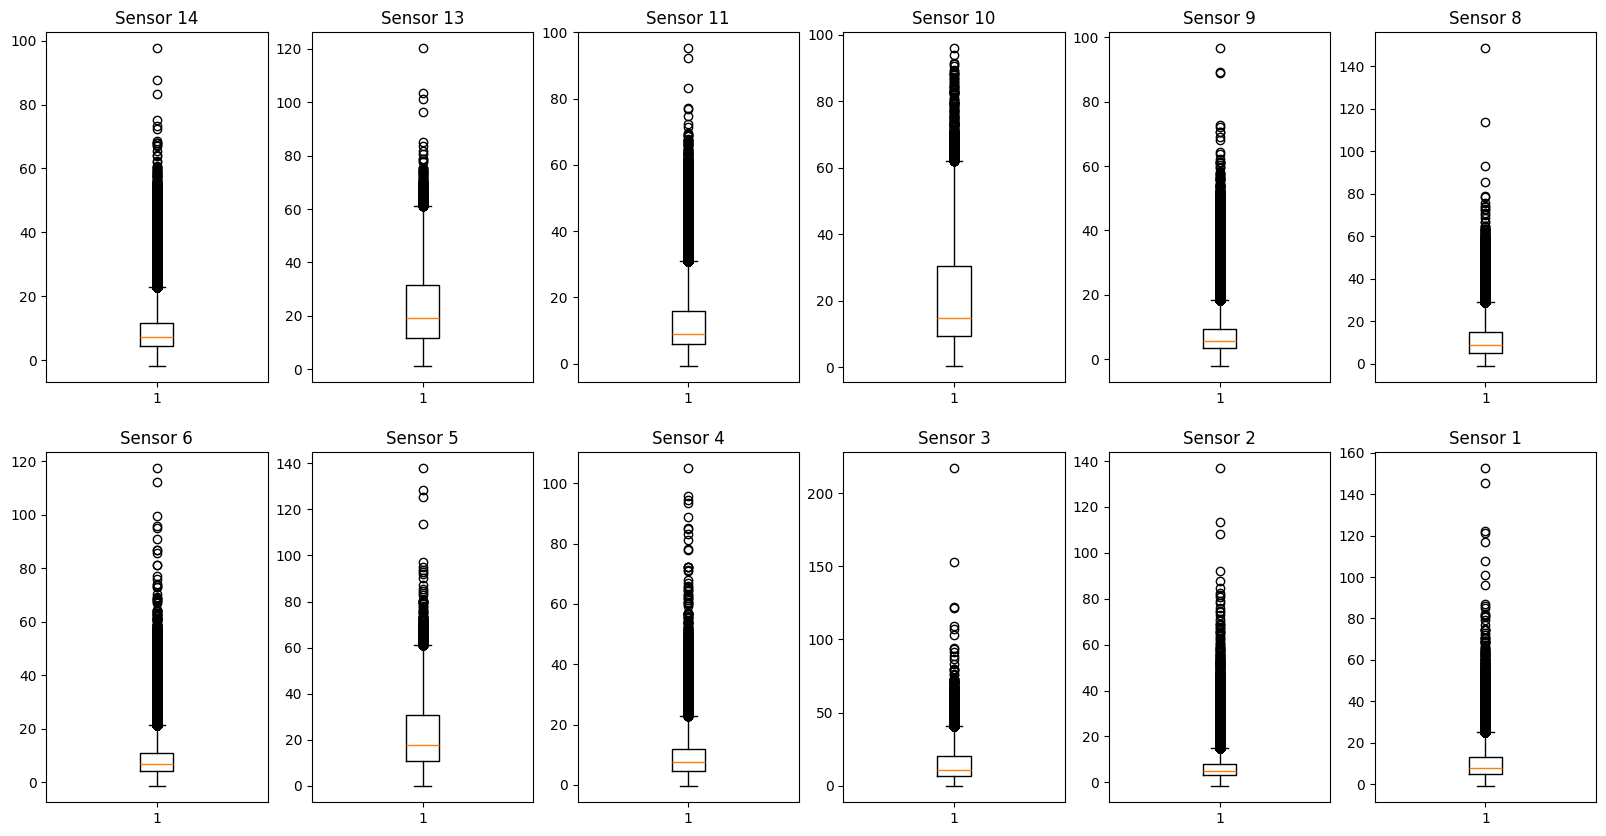

In [12]:
fig, ax = plt.subplots(2, 6, figsize=(20, 10))
idxs = acc_idxs.copy()
for i in range(2):
    for j in range(6):
        idx = idxs.pop()
        ax[i, j].boxplot(sensors_removed[f'area[{idx}]'])
        ax[i, j].set_title("Sensor " + str(idx))